Le but de ce fichier est de tracer l'histogramme de la valeur numérique d'évaluation (quantile) pour chacune des trois métriques utilisée

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
quantile_entropy=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/Selected subjects/For each subject/Evaluation_metrics/Quantile for each subject/quantile_entropy.npy")
quantile_chamfer= np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/Selected subjects/For each subject/Evaluation_metrics/Quantile for each subject/quantile_chamfer.npy")
quantile_SVM=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/Selected subjects/For each subject/Evaluation_metrics/Quantile for each subject/quantile_SVM.npy")

In [78]:
len(quantile_entropy)

825

In [79]:
len(quantile_entropy[quantile_entropy==-1])

117

In [80]:
quantile_entropy= quantile_entropy[quantile_entropy>=0]
quantile_chamfer= quantile_chamfer[quantile_chamfer>=0]
quantile_SVM= quantile_SVM[quantile_SVM>=0]


In [81]:
len(quantile_entropy)

160

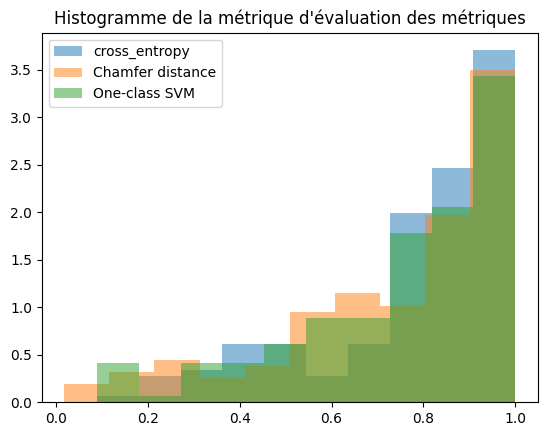

In [82]:
plt.hist(quantile_entropy, density=True, alpha=0.5, label="cross_entropy")
plt.hist(quantile_chamfer, density=True, alpha=0.5, label="Chamfer distance")
plt.hist(quantile_SVM, density=True, alpha=0.5, label="One-class SVM")
plt.title("Histogramme de la métrique d'évaluation des métriques")
plt.legend()
plt.show()

In [83]:
quantile_entropy.mean()

np.float64(0.77734375)

In [84]:
quantile_chamfer.mean()

np.float64(0.7402901785714285)

In [85]:
quantile_SVM.mean()

np.float64(0.7498883928571429)

In [86]:
len(quantile_entropy[quantile_entropy==1])

19

In [87]:
len(quantile_chamfer[quantile_chamfer==1])

9

In [88]:
len(quantile_SVM[quantile_SVM==1])

8

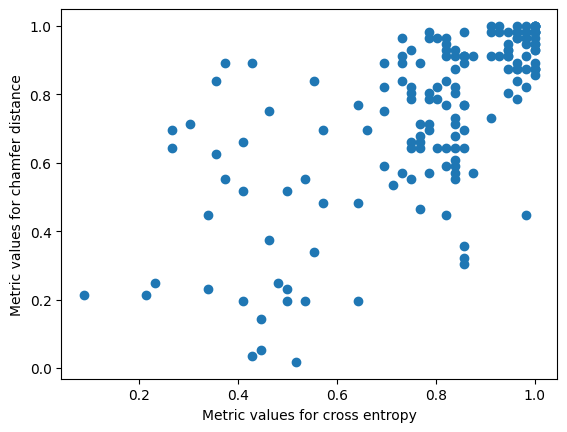

In [89]:
plt.scatter(quantile_entropy, quantile_chamfer)
plt.xlabel("Metric values for cross entropy")
plt.ylabel("Metric values for chamfer distance")
plt.show()

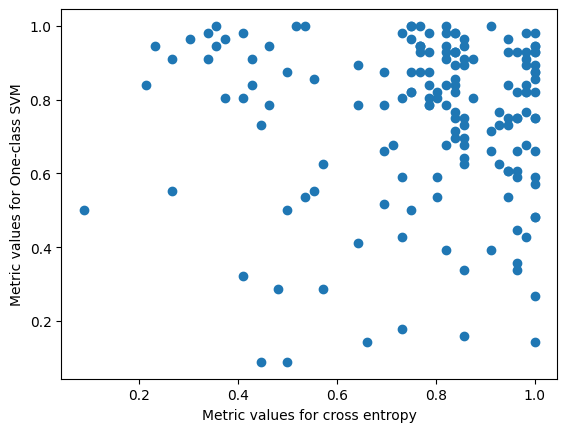

In [90]:
plt.scatter(quantile_entropy, quantile_SVM)
plt.xlabel("Metric values for cross entropy")
plt.ylabel("Metric values for One-class SVM")
plt.show()

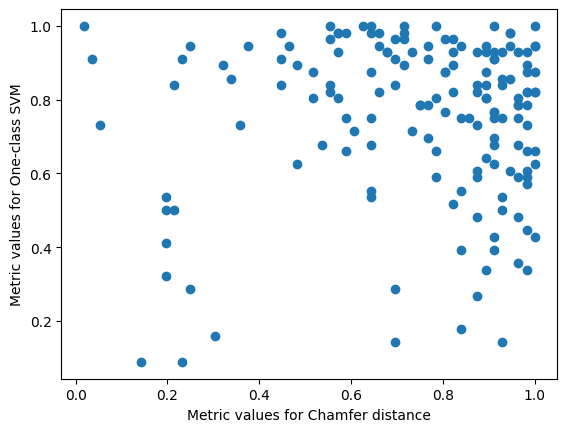

In [91]:
plt.scatter(quantile_chamfer, quantile_SVM)
plt.xlabel("Metric values for Chamfer distance")
plt.ylabel("Metric values for One-class SVM")
plt.show()

Pour les sujets dont le type de Lésion est résection

In [92]:
df_PEPR= pd.read_excel("/neurospin/dico/data/human/PEPR_Marseille/PourTheotime.ods", engine="odf")


In [93]:
df_cross_entropy = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/Reconstruction_error.csv")

In [94]:
selected_index = np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/All the subjects/histogram_non_zero/index_to_save.npy")

In [95]:
selected_index_1 = []

In [96]:


for a in df_cross_entropy.iloc[:, 0]:
    if a=="0109GRE_10102016":
        selected_index_1.append(978)
    if a=="0109GRE_12112016":
        selected_index_1.append(979)
    if a=="0164ROT_29012018":
        selected_index_1.append(1158)
    if a=="0168ROT_01032018":
        selected_index_1.append(1172)
    if a=="0168ROT_17092018":
        selected_index_1.append(1173)

    id = a[:7]

    matches = df_PEPR.index[df_PEPR.iloc[:, 0].str[:7] == id]
    if len(matches) == 1:
        selected_index_1.append(matches[0])
    else:
        #print(len(matches))
        j=0
        for i in matches:
            c= len(df_PEPR.iloc[i, 0])
            if c==9:
                id  = a[:7] + a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==11:
                id = a[:7]+ a[10:12]+a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==10:
                id = a[:7]+ a[11]+a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==7:
                selected_index_1.append(747)
                j+=1
selected_index_1= np.array(selected_index_1)

In [97]:
df_PEPR= df_PEPR.loc[selected_index_1].reset_index(drop=True) #1 ere sélection
df_PEPR= df_PEPR.loc[selected_index].reset_index(drop=True) #2e sélection


In [98]:
df_PEPR

,Patient Code,MR negative,Lesion type,Position (Intranat XYZ)
0,0001BAR,y,0: MRI negative,NaN
1,0001FLO,n,2.1: FCD,70 70 98
2,0001HUH18,y,0: MRI negative,NaN
3,0001KCH,y,NaN,NaN
4,0001LYO,n,1: HS,114 146 125
...,...,...,...,...
820,0265GRE13,y,0: MRI negative,NaN
821,0266GRE,n,6.1: Cerebral cavernous malformation,88 185 44
822,0268GRE,y,0: MRI negative,NaN
823,0272GRE,y,0: MRI negative,NaN


In [99]:
idx = df_PEPR.index[df_PEPR["Lesion type"].str.endswith("Resection", na=False)]


In [100]:
quantile_entropy=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/Selected subjects/For each subject/Evaluation_metrics/Quantile for each subject/quantile_entropy.npy")
quantile_chamfer= np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/Selected subjects/For each subject/Evaluation_metrics/Quantile for each subject/quantile_chamfer.npy")
quantile_SVM=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/Selected subjects/For each subject/Evaluation_metrics/Quantile for each subject/quantile_SVM.npy")

In [101]:
quantile_entropy=quantile_entropy[idx]
quantile_chamfer=quantile_chamfer[idx]
quantile_SVM=quantile_SVM[idx]


In [102]:
quantile_entropy= quantile_entropy[quantile_entropy>=0]
quantile_chamfer= quantile_chamfer[quantile_chamfer>=0]
quantile_SVM= quantile_SVM[quantile_SVM>=0]


In [103]:
len(quantile_entropy)

34

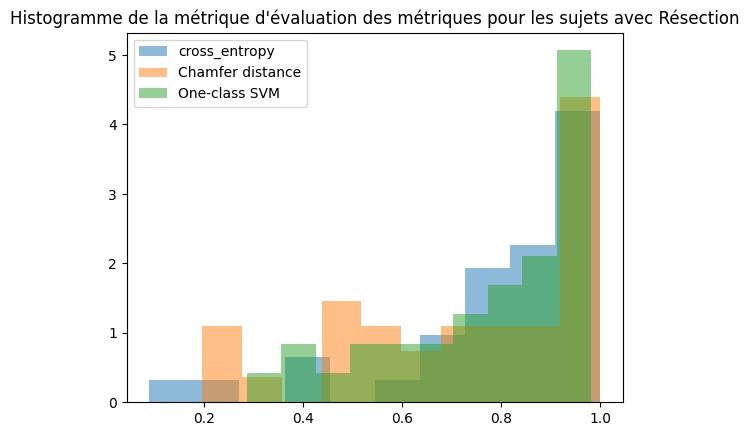

In [104]:
plt.hist(quantile_entropy, density=True, alpha=0.5, label="cross_entropy")
plt.hist(quantile_chamfer, density=True, alpha=0.5, label="Chamfer distance")
plt.hist(quantile_SVM, density=True, alpha=0.5, label="One-class SVM")
plt.title("Histogramme de la métrique d'évaluation des métriques pour les sujets avec Résection")
plt.legend()
plt.show()

In [105]:
quantile_entropy.mean()

np.float64(0.7925420168067226)

In [106]:
quantile_chamfer.mean()

np.float64(0.7263655462184874)

In [107]:
quantile_SVM.mean()

np.float64(0.7752100840336136)

In [108]:
len(quantile_entropy[quantile_entropy==1])

4

Pour les sujets avec Polymicrogyria

In [109]:
idx2 = df_PEPR.index[df_PEPR["Lesion type"].str.endswith("Polymicrogyria", na=False)]


In [110]:
quantile_entropy=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/Selected subjects/For each subject/Evaluation_metrics/Quantile for each subject/quantile_entropy.npy")
quantile_chamfer= np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/Selected subjects/For each subject/Evaluation_metrics/Quantile for each subject/quantile_chamfer.npy")
quantile_SVM=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/Selected subjects/For each subject/Evaluation_metrics/Quantile for each subject/quantile_SVM.npy")

In [111]:
quantile_entropy=quantile_entropy[idx2]
quantile_chamfer=quantile_chamfer[idx2]
quantile_SVM=quantile_SVM[idx2]


In [112]:
quantile_entropy= quantile_entropy[quantile_entropy>=0]
quantile_chamfer= quantile_chamfer[quantile_chamfer>=0]
quantile_SVM= quantile_SVM[quantile_SVM>=0]


In [113]:
len(quantile_entropy)

5

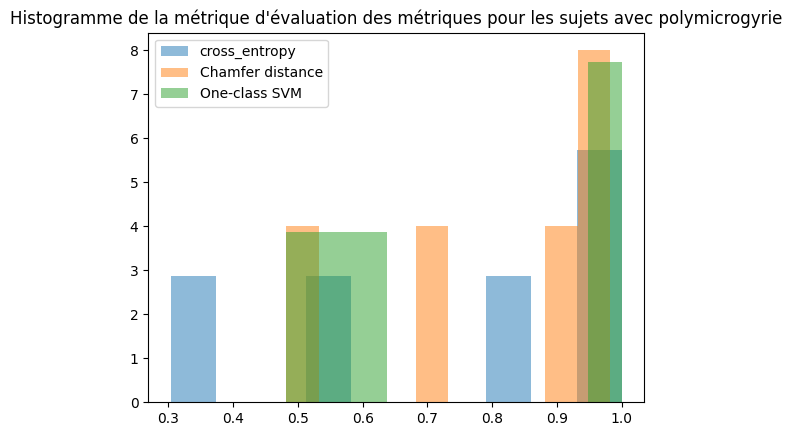

In [114]:
plt.hist(quantile_entropy, density=True, alpha=0.5, label="cross_entropy")
plt.hist(quantile_chamfer, density=True, alpha=0.5, label="Chamfer distance")
plt.hist(quantile_SVM, density=True, alpha=0.5, label="One-class SVM")
plt.title("Histogramme de la métrique d'évaluation des métriques pour les sujets avec polymicrogyrie")
plt.legend()
plt.show()